In [1]:
import cv2
import csv
import tqdm
import numpy as np
from geotiff import GeoTiff
from PIL import Image, ImageDraw

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
ghi = GeoTiff("india_solar/GHI.tif")
ghi_arr = ghi.read()

In [3]:
ghi.tif_shape

[12800, 12800]

In [4]:
STEP_SIZE = 0.0025
S_BOUND_L = 88.00
S_BOUND_R = 88.95
S_BOUND_B = 27.05
S_BOUND_T = 28.15

BOUND_L = 66.00
BOUND_T = 38.00

WIDTH = int((S_BOUND_R - S_BOUND_L) // STEP_SIZE + 1)
HEIGHT = int((S_BOUND_T - S_BOUND_B) // STEP_SIZE + 1)

WIDTH, HEIGHT

(381, 440)

In [5]:
bounding_box = np.zeros((HEIGHT, WIDTH), dtype="float64")
bounding_box.shape

(440, 381)

In [6]:
def get_ghi(lat, lon):
    lat_ind = int((BOUND_T - lat) / STEP_SIZE)
    lon_ind = int((lon - BOUND_L) / STEP_SIZE)

    return ghi_arr[lat_ind][lon_ind]

In [7]:
def get_bounding_box_coords(lat, lon):
    lat_ind = int((S_BOUND_T - lat) / STEP_SIZE)
    lon_ind = int((lon - S_BOUND_L) / STEP_SIZE)
    if lon_ind < 0 or lat_ind < 0 or lon_ind >= WIDTH or lat_ind >= HEIGHT:
        return 0, 0, 0
    return lat_ind, lon_ind, 1

In [8]:
csvfile = open("sikkim.csv", "r", newline="")
reader = csv.reader(csvfile, delimiter=",")
print(next(reader))

for row in tqdm.tqdm(reader):
    lat = float(row[0])
    lon = float(row[1])
    effective_area = float(row[2]) * float(row[3])
    ghi_net = effective_area * get_ghi(lat, lon)
    lat_ind, lon_ind, valid = get_bounding_box_coords(lat, lon)
    bounding_box[lat_ind][lon_ind] += ghi_net * valid

csvfile.close()

['latitude', 'longitude', 'area_in_meters', 'confidence', 'geometry', 'full_plus_code']


330652it [01:01, 5351.05it/s]


In [9]:
ceiling, floor = bounding_box.max(), np.min(bounding_box[np.nonzero(bounding_box)])
ceiling, floor

(32682159.61690858, 3325.8244928466793)

In [10]:
boundary_string = "88.0158306797409 27.216294415273946,88.03574339946746 27.222400492647676,88.05153624614715 27.215683789128178,88.06595580181121 27.215683789128178,88.07831542095184 27.199806334767718,88.07831542095184 27.171709914471737,88.09410826763153 27.136273911053518,88.1531597813034 27.11121754304368,88.18268553813934 27.130774213565875,88.2135845859909 27.131996391942142,88.22937743267059 27.120385158052184,88.24860350688934 27.120996305677604,88.26714293560028 27.12649648405201,88.28681540887058 27.12620049369285,88.31462455193699 27.12421434411219,88.32265355963641 27.118577530966164,88.3219669141286 27.10482560464659,88.33501317877703 27.10727051505184,88.34119298834734 27.10971537205394,88.35011937994891 27.10085251134755,88.39234807867938 27.093517199458216,88.42969582012842 27.081762709862087,88.45304176739404 27.085430810756915,88.46952125958154 27.11538247199747,88.47642158975975 27.122302853643557,88.48576564659119 27.12011168704108,88.48816890586853 27.12469522405067,88.49778194297791 27.12316739924948,88.50499172080994 27.13630601045844,88.53211421836853 27.149748572506727,88.53348750938416 27.15646924712594,88.52147121299744 27.17418545086739,88.54481716026307 27.18334790131367,88.5849859224701 27.18792884439125,88.66120357383728 27.164105886540778,88.69004268516541 27.181210063502718,88.71750850547791 27.149443077690112,88.73536128868103 27.13600047889429,88.76282710899353 27.17632342326196,88.78469104020544 27.183119585203976,88.80323046891638 27.247235792357284,88.88288134782263 27.261885742660212,88.91924342147328 27.28016528238346,88.91649683944203 27.333856410567815,88.89325741077512 27.33201790581349,88.86098507190793 27.383854835910782,88.8369524791345 27.377757633234992,88.77584102893918 27.471008044557955,88.79163387561887 27.531304545189194,88.76374013404681 27.56472630440318,88.80905873756244 27.592723090331152,88.81043202857806 27.64626223834012,88.85437734107806 27.674238188845205,88.84064443092181 27.71314933537816,88.86673696021869 27.741108151488785,88.85575063209369 27.81401041590267,88.87909657935931 27.832228344265356,88.88321645240619 27.85651415867653,88.86673696021869 27.92448549269094,88.83377797584369 27.925698878551522,88.85163075904681 27.968158800126883,88.83789784889056 28.014239232766663,88.75422091806223 28.07741848312794,88.6649570020466 28.074995112314532,88.63335993308557 28.12090800917548,88.59765436667932 28.084566430230346,88.5523357631637 28.083354832302852,88.54821589011682 28.03730398448224,88.4974041225387 28.053060442088523,88.46537789119535 28.0167073091593,88.4186859966641 27.999732988441405,88.41181954158597 27.983968724645955,88.3912201763516 27.97547932012497,88.3637543560391 27.99003217585573,88.25114449275785 27.950007098032376,88.23878487361722 27.96820215585858,88.2044525982266 27.963350440330448,88.20526261956188 27.94154261558863,88.14140458733532 27.96398450494946,88.13110490471813 27.94882157726247,88.13591142327282 27.936689701960532,88.11805864006969 27.919702787829358,88.13797135979625 27.883900196504005,88.19358964592907 27.85415683970058,88.201142746515 27.839585686809958,88.17218961891314 27.81848383979496,88.19553556617876 27.790544897553513,88.17356290992876 27.74193832920757,88.15777006324907 27.740722886899132,88.14678373512407 27.70182157534662,88.14369217294882 27.661325542218705,88.07228104013632 27.56032326149767,88.04206863779257 27.477505079077524,88.07228104013632 27.43241606313728,88.04069534677694 27.373894750964435,88.06678787607382 27.33974301607372,88.03657547373007 27.301919886788525,88.0158306797409 27.216294415273946"

In [11]:
boundary = [get_bounding_box_coords(float(i.split()[1]), float(i.split()[0]))[:2] for i in boundary_string.split(",")]

In [12]:
boundary_mask = np.zeros((HEIGHT, WIDTH), dtype="int8")
boundary_image = Image.fromarray(boundary_mask)
mask_draw = ImageDraw.Draw(boundary_image)
mask_draw.polygon([(i[1], i[0]) for i in boundary], fill=1)
boundary_mask = np.array(boundary_image)

In [13]:
boundary_mask = boundary_mask == 1

In [14]:
sikkim_map = np.where(boundary_mask, bounding_box + 1, np.nan)

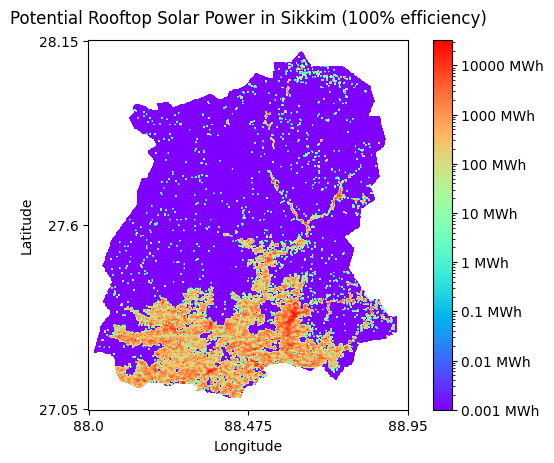

In [46]:
energy_fmt_func = lambda x,pos: f"{x:g} MWh"
energy_fmt = mpl.ticker.FuncFormatter(energy_fmt_func)

cmap = mpl.colormaps.get_cmap('rainbow')
cmap.set_bad(color='white')

plt.title("Potential Rooftop Solar Power in Sikkim (100% efficiency)", pad=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.imshow(sikkim_map / 1000, cmap=cmap, norm=mpl.colors.LogNorm())
plt.xticks([0, sikkim_map.shape[1] // 2, sikkim_map.shape[1] - 1], [S_BOUND_L, (S_BOUND_L + S_BOUND_R) / 2, S_BOUND_R])
plt.yticks([0, sikkim_map.shape[0] // 2, sikkim_map.shape[0] - 1], [S_BOUND_T, (S_BOUND_T + S_BOUND_B) / 2, S_BOUND_B])
plt.colorbar(location="right", format=energy_fmt)

plt.savefig('sikkim.png')

In [234]:
with open("map.npy", "wb") as f:
    np.save(f, bounding_box)